In [109]:
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV,cross_validate

import warnings
from sklearn.exceptions import ConvergenceWarning

# Models

from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Visualizing
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")

In [3]:
from preprocessingHelper import PreprocessingHelper

In [4]:
pp_train=PreprocessingHelper(dataframe=train_df)
pp_test=PreprocessingHelper(dataframe=test_df)

Data Analysis

In [5]:
pp_train.checkDf()

##################### Shape #####################
(8693, 14)
##################### Describe #####################
               count        mean          std  min   25%   50%   75%      max
Age           8514.0   28.827930    14.489021  0.0  19.0  27.0  38.0     79.0
RoomService   8512.0  224.687617   666.717663  0.0   0.0   0.0  47.0  14327.0
FoodCourt     8510.0  458.077203  1611.489240  0.0   0.0   0.0  76.0  29813.0
ShoppingMall  8485.0  173.729169   604.696458  0.0   0.0   0.0  27.0  23492.0
Spa           8510.0  311.138778  1136.705535  0.0   0.0   0.0  59.0  22408.0
VRDeck        8505.0  304.854791  1145.717189  0.0   0.0   0.0  46.0  24133.0
##################### Info #####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSle

In [6]:
cat_cols,cat_but_car,num_cols=pp_train.grabColNames()

Observations = 8693

Variables = 14

catorical columns = 5

catorical but cardinal columns = 3

numerical columns = 6

numerical but categorical columns = 1



In [7]:
train_df["Transported"]=train_df["Transported"].apply(lambda x: 1 if x else 0)

        HomePlanet      Ratio
Earth         4602  52.939146
Europa        2131  24.513977
Mars          1759  20.234672
##########################################


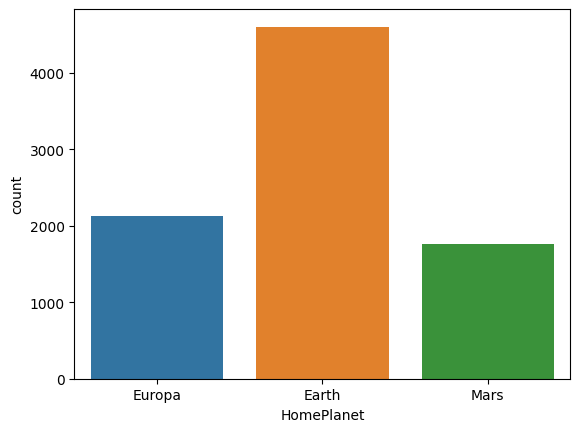

       CryoSleep      Ratio
False       5439  62.567583
True        3037  34.936156
##########################################


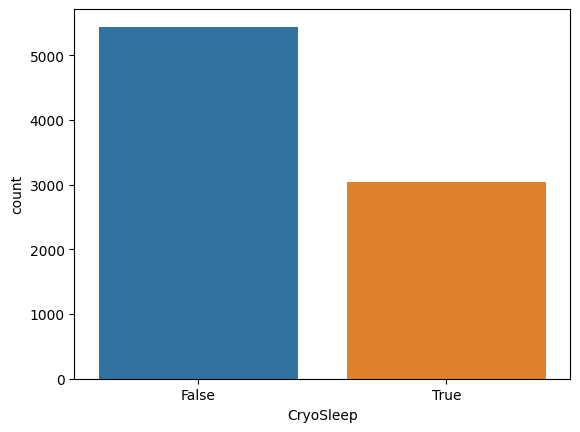

               Destination      Ratio
TRAPPIST-1e           5915  68.043253
55 Cancri e           1800  20.706315
PSO J318.5-22          796   9.156793
##########################################


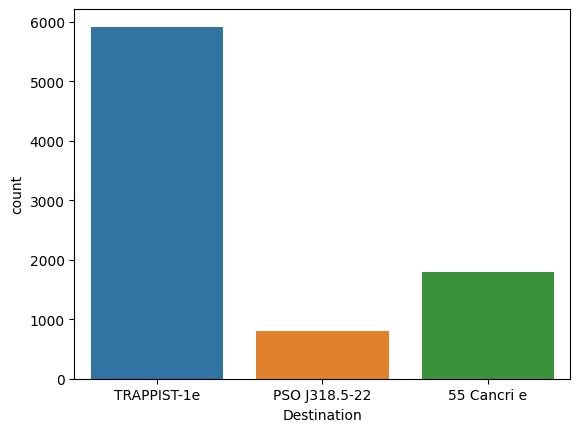

        VIP      Ratio
False  8291  95.375590
True    199   2.289198
##########################################


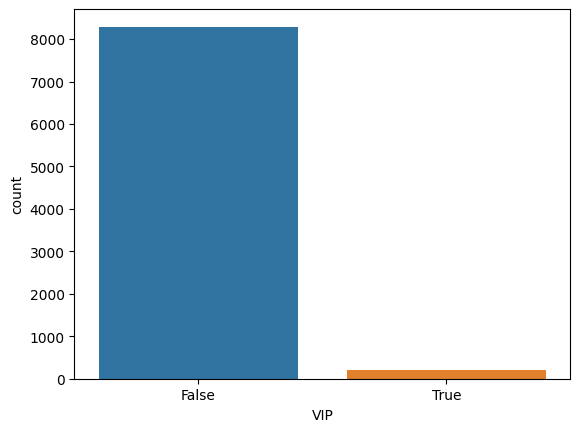

   Transported      Ratio
1         4378  50.362361
0         4315  49.637639
##########################################


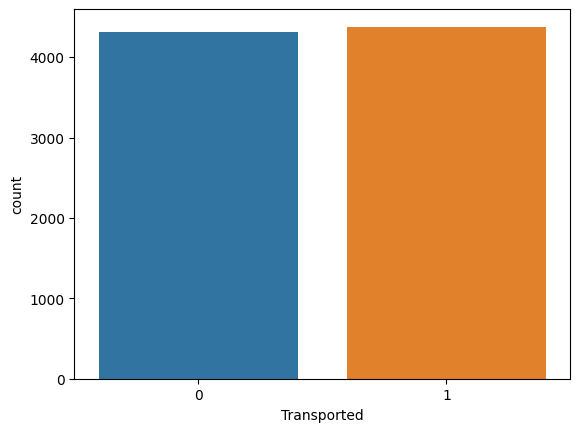

In [8]:
for col in cat_cols:
    pp_train.catSummary(col_name=col,plot=True)

      count      mean        std  min   5%   10%   20%   30%   40%   50%  \
Age  8514.0  28.82793  14.489021  0.0  4.0  13.0  18.0  21.0  24.0  27.0   

      60%   70%   80%   90%   95%   99%   max  
Age  31.0  35.0  41.0  49.0  56.0  65.0  79.0  



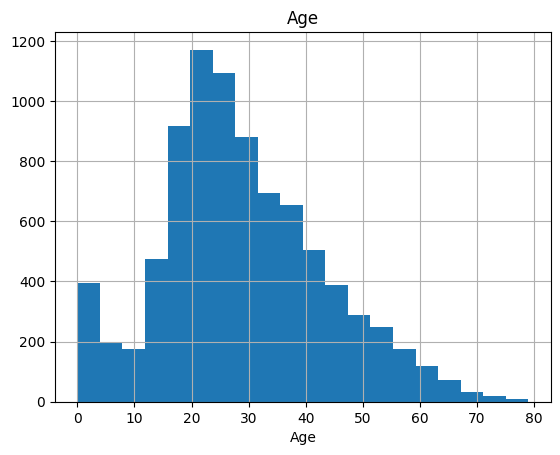

              count        mean         std  min   5%  10%  20%  30%  40%  \
RoomService  8512.0  224.687617  666.717663  0.0  0.0  0.0  0.0  0.0  0.0   

             50%  60%  70%    80%    90%      95%      99%      max  
RoomService  0.0  0.0  8.0  175.6  753.0  1274.25  3096.23  14327.0  



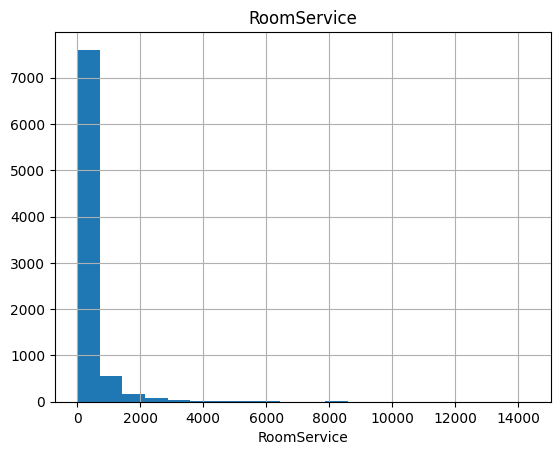

            count        mean         std  min   5%  10%  20%  30%  40%  50%  \
FoodCourt  8510.0  458.077203  1611.48924  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

           60%   70%    80%     90%     95%      99%      max  
FoodCourt  0.0  13.0  258.0  1026.0  2748.5  8033.31  29813.0  



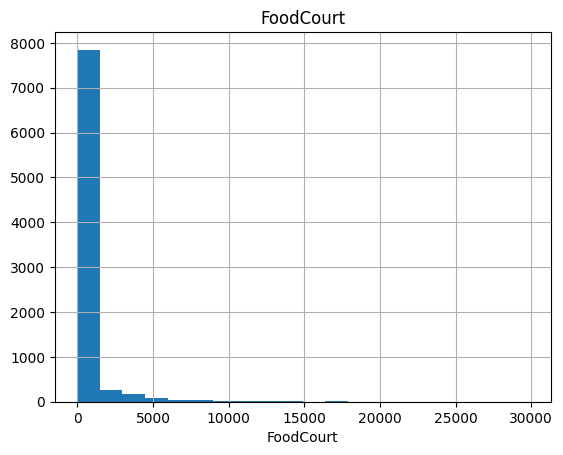

               count        mean         std  min   5%  10%  20%  30%  40%  \
ShoppingMall  8485.0  173.729169  604.696458  0.0  0.0  0.0  0.0  0.0  0.0   

              50%  60%  70%   80%    90%    95%      99%      max  
ShoppingMall  0.0  0.0  5.0  97.0  619.6  927.8  2333.44  23492.0  



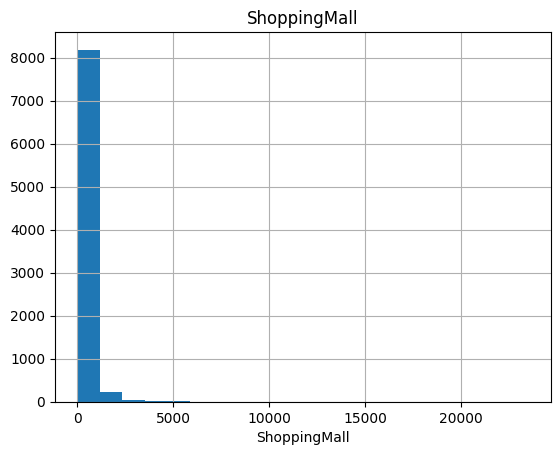

      count        mean          std  min   5%  10%  20%  30%  40%  50%  60%  \
Spa  8510.0  311.138778  1136.705535  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

      70%    80%    90%     95%     99%      max  
Spa  15.0  179.2  732.0  1607.1  5390.1  22408.0  



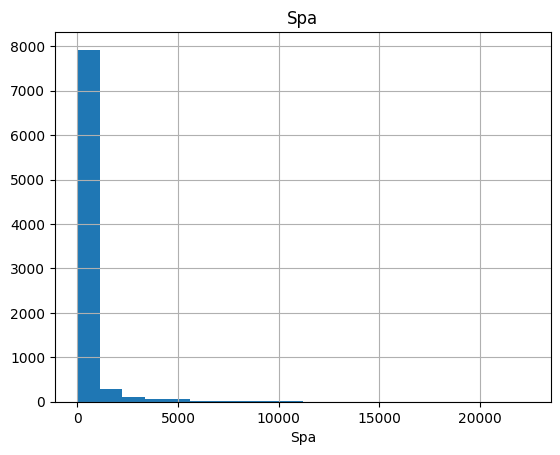

         count        mean          std  min   5%  10%  20%  30%  40%  50%  \
VRDeck  8505.0  304.854791  1145.717189  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

        60%  70%    80%    90%     95%      99%      max  
VRDeck  0.0  9.0  156.2  732.6  1534.2  5646.68  24133.0  



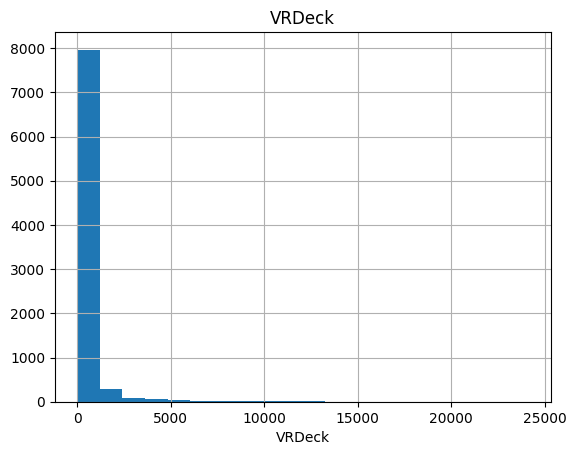

In [9]:
for col in num_cols:
    pp_train.numSummary(numerical_col=col,plot=True)

In [10]:
for col in cat_cols:
    if col!="Transported":
        pp_train.targetSummaryWithCat(categorical_col=col,target="Transported")

            Transported_Mean
HomePlanet                  
Earth               0.423946
Europa              0.658846
Mars                0.523024


##########################################

           Transported_Mean
CryoSleep                  
False              0.328921
True               0.817583


##########################################

               Transported_Mean
Destination                    
55 Cancri e            0.610000
PSO J318.5-22          0.503769
TRAPPIST-1e            0.471175


##########################################

       Transported_Mean
VIP                    
False          0.506332
True           0.381910


##########################################



C:\Users\pc\AppData\Local\Temp\ipykernel_13840\1144612935.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = train_df.corr()


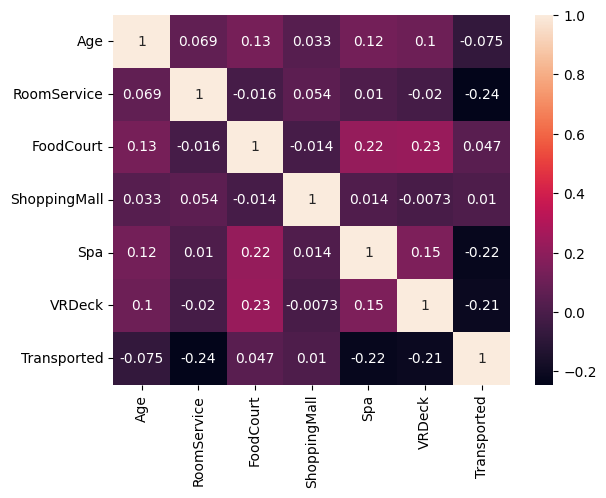

In [11]:
corrMatrix = train_df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [12]:
for col in num_cols:
    print(f"{col} {pp_train.checkOutlier(column_name=col,q1=0.05,q3=0.95)}")

Age False
RoomService True
FoodCourt True
ShoppingMall True
Spa True
VRDeck True


Feature Engineering

In [13]:
train_id=train_df["PassengerId"]

In [14]:
test_id=test_df["PassengerId"]

In [15]:
df=pd.concat([train_df,test_df])

In [16]:
pp_df=PreprocessingHelper(dataframe=df)

In [17]:
pp_df.missingValuesTable()

              Count     Ratio
HomePlanet      288  0.022205
CryoSleep       310  0.023901
Cabin           299  0.023053
Destination     274  0.021126
Age             270  0.020817
VIP             296  0.022822
RoomService     263  0.020278
FoodCourt       289  0.022282
ShoppingMall    306  0.023593
Spa             284  0.021897
VRDeck          268  0.020663
Name            294  0.022668
Transported    4277  0.329761


In [18]:
df["New_Passenger_Group"]=df["PassengerId"].apply(lambda x: x[0:4])

Cabin

In [19]:
df[df["Cabin"].isnull()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,New_Passenger_Group
15,0012_01,Earth,False,NaN,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,0.0,0.0,Justie Pooles,0.0,0012
93,0101_01,Mars,True,NaN,TRAPPIST-1e,31.0,False,0.0,0.0,0.0,0.0,0.0,Book Trad,1.0,0101
103,0110_01,Europa,False,NaN,TRAPPIST-1e,32.0,False,0.0,410.0,6.0,3929.0,764.0,Graviph Aloubtled,0.0,0110
222,0239_01,Mars,False,NaN,TRAPPIST-1e,37.0,False,637.0,0.0,0.0,92.0,319.0,Diedow Resty,0.0,0239
227,0244_01,Mars,True,NaN,TRAPPIST-1e,43.0,False,0.0,0.0,0.0,0.0,0.0,Froos Sad,1.0,0244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4209,9138_01,Europa,NaN,NaN,TRAPPIST-1e,41.0,False,0.0,1998.0,0.0,1023.0,867.0,Misamak Trupistic,NaN,9138
4248,9223_01,Mars,True,NaN,TRAPPIST-1e,24.0,False,0.0,0.0,NaN,0.0,0.0,Weessh Sun,NaN,9223
4249,9223_02,Mars,True,NaN,TRAPPIST-1e,17.0,False,0.0,0.0,0.0,0.0,0.0,Perit Sun,NaN,9223
4258,9238_05,Earth,True,NaN,TRAPPIST-1e,14.0,False,0.0,0.0,0.0,0.0,0.0,Caseye Emenez,NaN,9238


In [20]:
mode_selection = lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan
df["Cabin"]=df["Cabin"].fillna(df.groupby("New_Passenger_Group")["Cabin"].transform(mode_selection))

In [21]:
df.loc[df["Cabin"].isnull(),"Cabin"]="Un/9999/Un"

In [22]:
df["New_Cabin_Deck"]=df["Cabin"].apply(lambda x: x.split("/")[0])
df["New_Cabin_Num"]=df["Cabin"].apply(lambda x: x.split("/")[1])
df["New_Cabin_Side"]=df["Cabin"].apply(lambda x: x.split("/")[2])

In [23]:
df.loc[df["New_Cabin_Deck"]=="Un",["New_Cabin_Deck","New_Cabin_Num","New_Cabin_Side"]]=np.NAN

In [24]:
df=df.drop("Cabin",axis=1)

Name

In [25]:
df.loc[df["Name"].isnull(),"Name"]="Unknown Unknown"

In [26]:
df["New_Name"]=df["Name"].apply(lambda x: x.split(" ")[0])
df["New_Surname"]=df["Name"].apply(lambda x: x.split(" ")[1])

In [27]:
df.loc[df["New_Name"]=="Unknown",["New_Name","New_Surname"]]=np.NaN

In [28]:
df=df.drop("Name",axis=1)

In [29]:
pp_df.dataframe=df

In [30]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,New_Passenger_Group,New_Cabin_Deck,New_Cabin_Num,New_Cabin_Side,New_Name,New_Surname
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0.0,0001,B,0,P,Maham,Ofracculy
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,1.0,0002,F,0,S,Juanna,Vines
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0.0,0003,A,0,S,Altark,Susent
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0.0,0003,A,0,S,Solam,Susent
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1.0,0004,F,1,S,Willy,Santantines


In [32]:
df["New_Group_Size"]=df["New_Passenger_Group"].map(lambda x: df["New_Passenger_Group"].value_counts()[x])

In [33]:
df["New_Family_Size"]=np.NaN
df.loc[~(df["New_Surname"].isnull()),"New_Family_Size"]=df.loc[~(df["New_Surname"].isnull()),"New_Surname"].map(lambda x: df.loc[~(df["New_Surname"].isnull()),"New_Surname"].value_counts()[x])

Missing Values

In [31]:
pp_df.missingValuesTable()

                Count     Ratio
HomePlanet        288  0.022205
CryoSleep         310  0.023901
Destination       274  0.021126
Age               270  0.020817
VIP               296  0.022822
RoomService       263  0.020278
FoodCourt         289  0.022282
ShoppingMall      306  0.023593
Spa               284  0.021897
VRDeck            268  0.020663
Transported      4277  0.329761
New_Cabin_Deck    162  0.012490
New_Cabin_Num     162  0.012490
New_Cabin_Side    162  0.012490
New_Name          294  0.022668
New_Surname       294  0.022668


In [34]:
pp_df.dataframe=df
cat_cols,cat_but_car,num_cols=pp_df.grabColNames()

Observations = 12970

Variables = 20

catorical columns = 8

catorical but cardinal columns = 5

numerical columns = 7

numerical but categorical columns = 2



In [36]:
cat_cols.remove("Transported")

In [41]:
# impute numerical values with median

imputer = SimpleImputer(strategy='median')
imputer.fit(df[num_cols])
df[num_cols] = imputer.transform(df[num_cols])

# impute categorical values with mode

imputer_cat = SimpleImputer(strategy='most_frequent')
imputer_cat.fit(df[cat_cols])
df[cat_cols] = imputer_cat.transform(df[cat_cols])

In [42]:
pp_df.missingValuesTable()

               Count     Ratio
Transported     4277  0.329761
New_Cabin_Num    162  0.012490
New_Name         294  0.022668
New_Surname      294  0.022668


Age

In [43]:
df.loc[df['Age']<1,'New_Age_Group']='Baby'
df.loc[(df['Age']>=1)&(df['Age']<12),'New_Age_Group']='Child'
df.loc[(df['Age']>=12)&(df['Age']<18),'New_Age_Group']='Adolescence'
df.loc[(df['Age']>=18)&(df['Age']<30),'New_Age_Group']='Young_Adult'
df.loc[(df['Age']>=30)&(df['Age']<50),'New_Age_Group']='Senior'
df.loc[(df['Age']>=50),'New_Age_Group']='Elder'

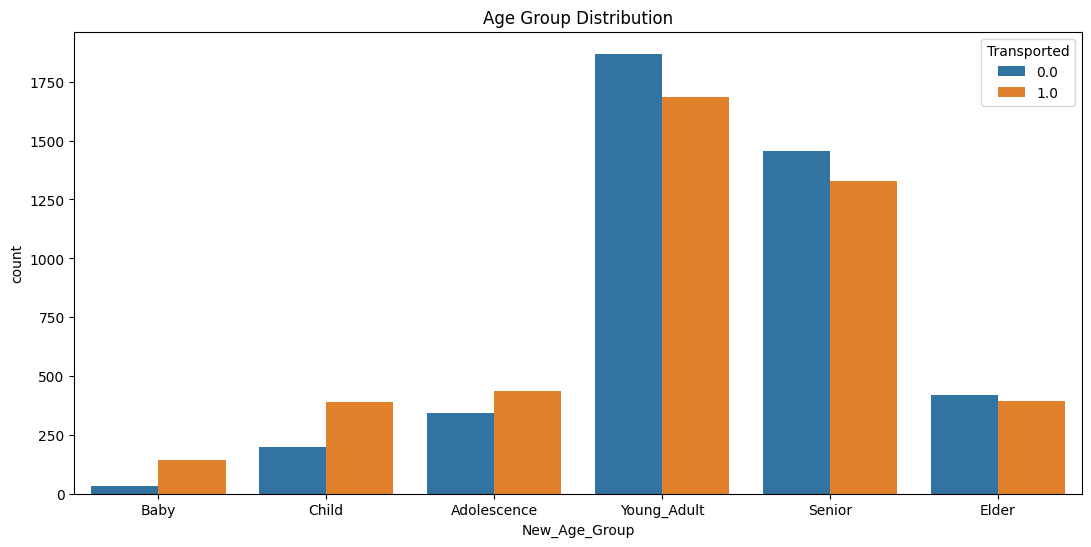

In [44]:
plt.figure(figsize=(13,6))
g=sns.countplot(data=df, x="New_Age_Group", hue="Transported", order=["Baby","Child","Adolescence","Young_Adult","Senior","Elder"])
plt.title("Age Group Distribution")
plt.show()

Total Expenses

In [45]:
luxury_exp_cols=["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]

In [47]:
df["New_Total_Expenses"]=df[luxury_exp_cols].sum(axis=1)

In [48]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,New_Passenger_Group,New_Cabin_Deck,New_Cabin_Num,New_Cabin_Side,New_Name,New_Surname,New_Group_Size,New_Family_Size,New_Age_Group,New_Total_Expenses
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,...,0001,B,0,P,Maham,Ofracculy,1,3.0,Senior,0.0
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,...,0002,F,0,S,Juanna,Vines,1,4.0,Young_Adult,736.0
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,...,0003,A,0,S,Altark,Susent,2,7.0,Elder,10383.0
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,...,0003,A,0,S,Solam,Susent,2,7.0,Senior,5176.0
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,...,0004,F,1,S,Willy,Santantines,1,9.0,Adolescence,1091.0


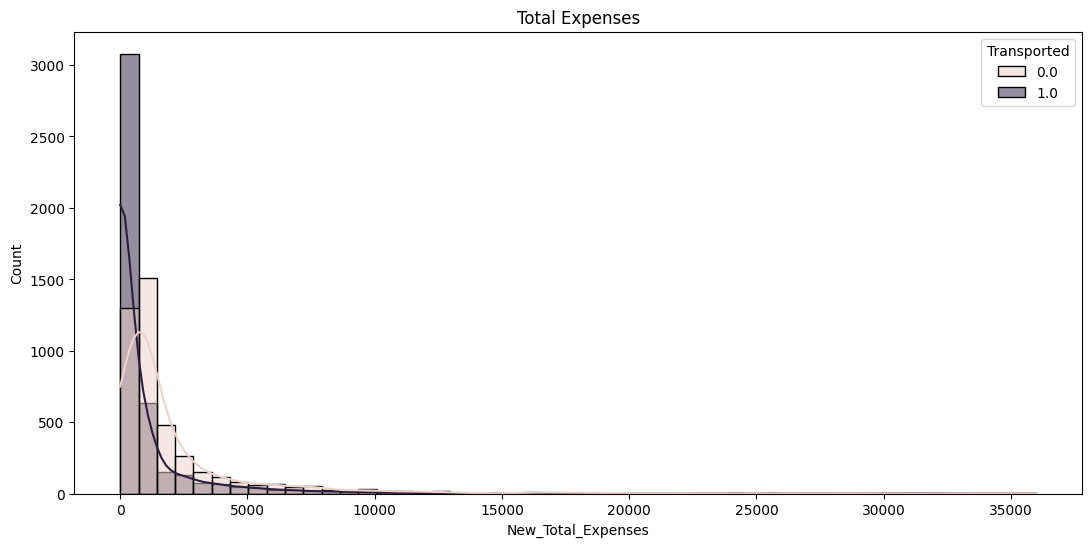

In [49]:
plt.figure(figsize=(13,6))
sns.histplot(data=df, x="New_Total_Expenses", hue="Transported",bins=50,kde=True)
plt.title("Total Expenses")
plt.show()

In [92]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,New_Passenger_Group,New_Cabin_Deck,New_Cabin_Num,New_Cabin_Side,New_Name,New_Surname,New_Group_Size,New_Family_Size,New_Age_Group,New_Total_Expenses
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,...,0001,B,0,P,Maham,Ofracculy,1,3.0,Senior,0.0
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,...,0002,F,0,S,Juanna,Vines,1,4.0,Young_Adult,736.0
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,...,0003,A,0,S,Altark,Susent,2,7.0,Elder,10383.0
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,...,0003,A,0,S,Solam,Susent,2,7.0,Senior,5176.0
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,...,0004,F,1,S,Willy,Santantines,1,9.0,Adolescence,1091.0


In [57]:
df["New_Premium_Passenger"]=0
df.loc[(df["New_Total_Expenses"]>=df["New_Total_Expenses"].median())&df["VIP"],"New_Premium_Passenger"]=1

Encoding & Log Transform & Scaling

In [61]:
cat_cols,cat_but_car,num_cols=pp_df.grabColNames()

Observations = 12970

Variables = 23

catorical columns = 10

catorical but cardinal columns = 5

numerical columns = 8

numerical but categorical columns = 2



In [63]:
cat_cols.remove("Transported")

In [64]:
df=pp_df.oneHotEncoder(cat_cols=cat_cols)

c:\Users\pc\Documents\GitHub\Spaceship-Titanic-Kaggle-Competition\preprocessingHelper.py:682: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dataframe=pd.get_dummies(dataframe,columns=[col],drop_first=drop_first)


In [65]:
df.head()

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,New_Passenger_Group,New_Cabin_Num,...,New_Group_Size_5,New_Group_Size_6,New_Group_Size_7,New_Group_Size_8,New_Age_Group_Baby,New_Age_Group_Child,New_Age_Group_Elder,New_Age_Group_Senior,New_Age_Group_Young_Adult,New_Premium_Passenger_1
0,0001_01,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0001,0,...,0,0,0,0,0,0,0,1,0,0
1,0002_01,24.0,109.0,9.0,25.0,549.0,44.0,1.0,0002,0,...,0,0,0,0,0,0,0,0,1,0
2,0003_01,58.0,43.0,3576.0,0.0,6715.0,49.0,0.0,0003,0,...,0,0,0,0,0,0,1,0,0,1
3,0003_02,33.0,0.0,1283.0,371.0,3329.0,193.0,0.0,0003,0,...,0,0,0,0,0,0,0,1,0,0
4,0004_01,16.0,303.0,70.0,151.0,565.0,2.0,1.0,0004,1,...,0,0,0,0,0,0,0,0,0,0


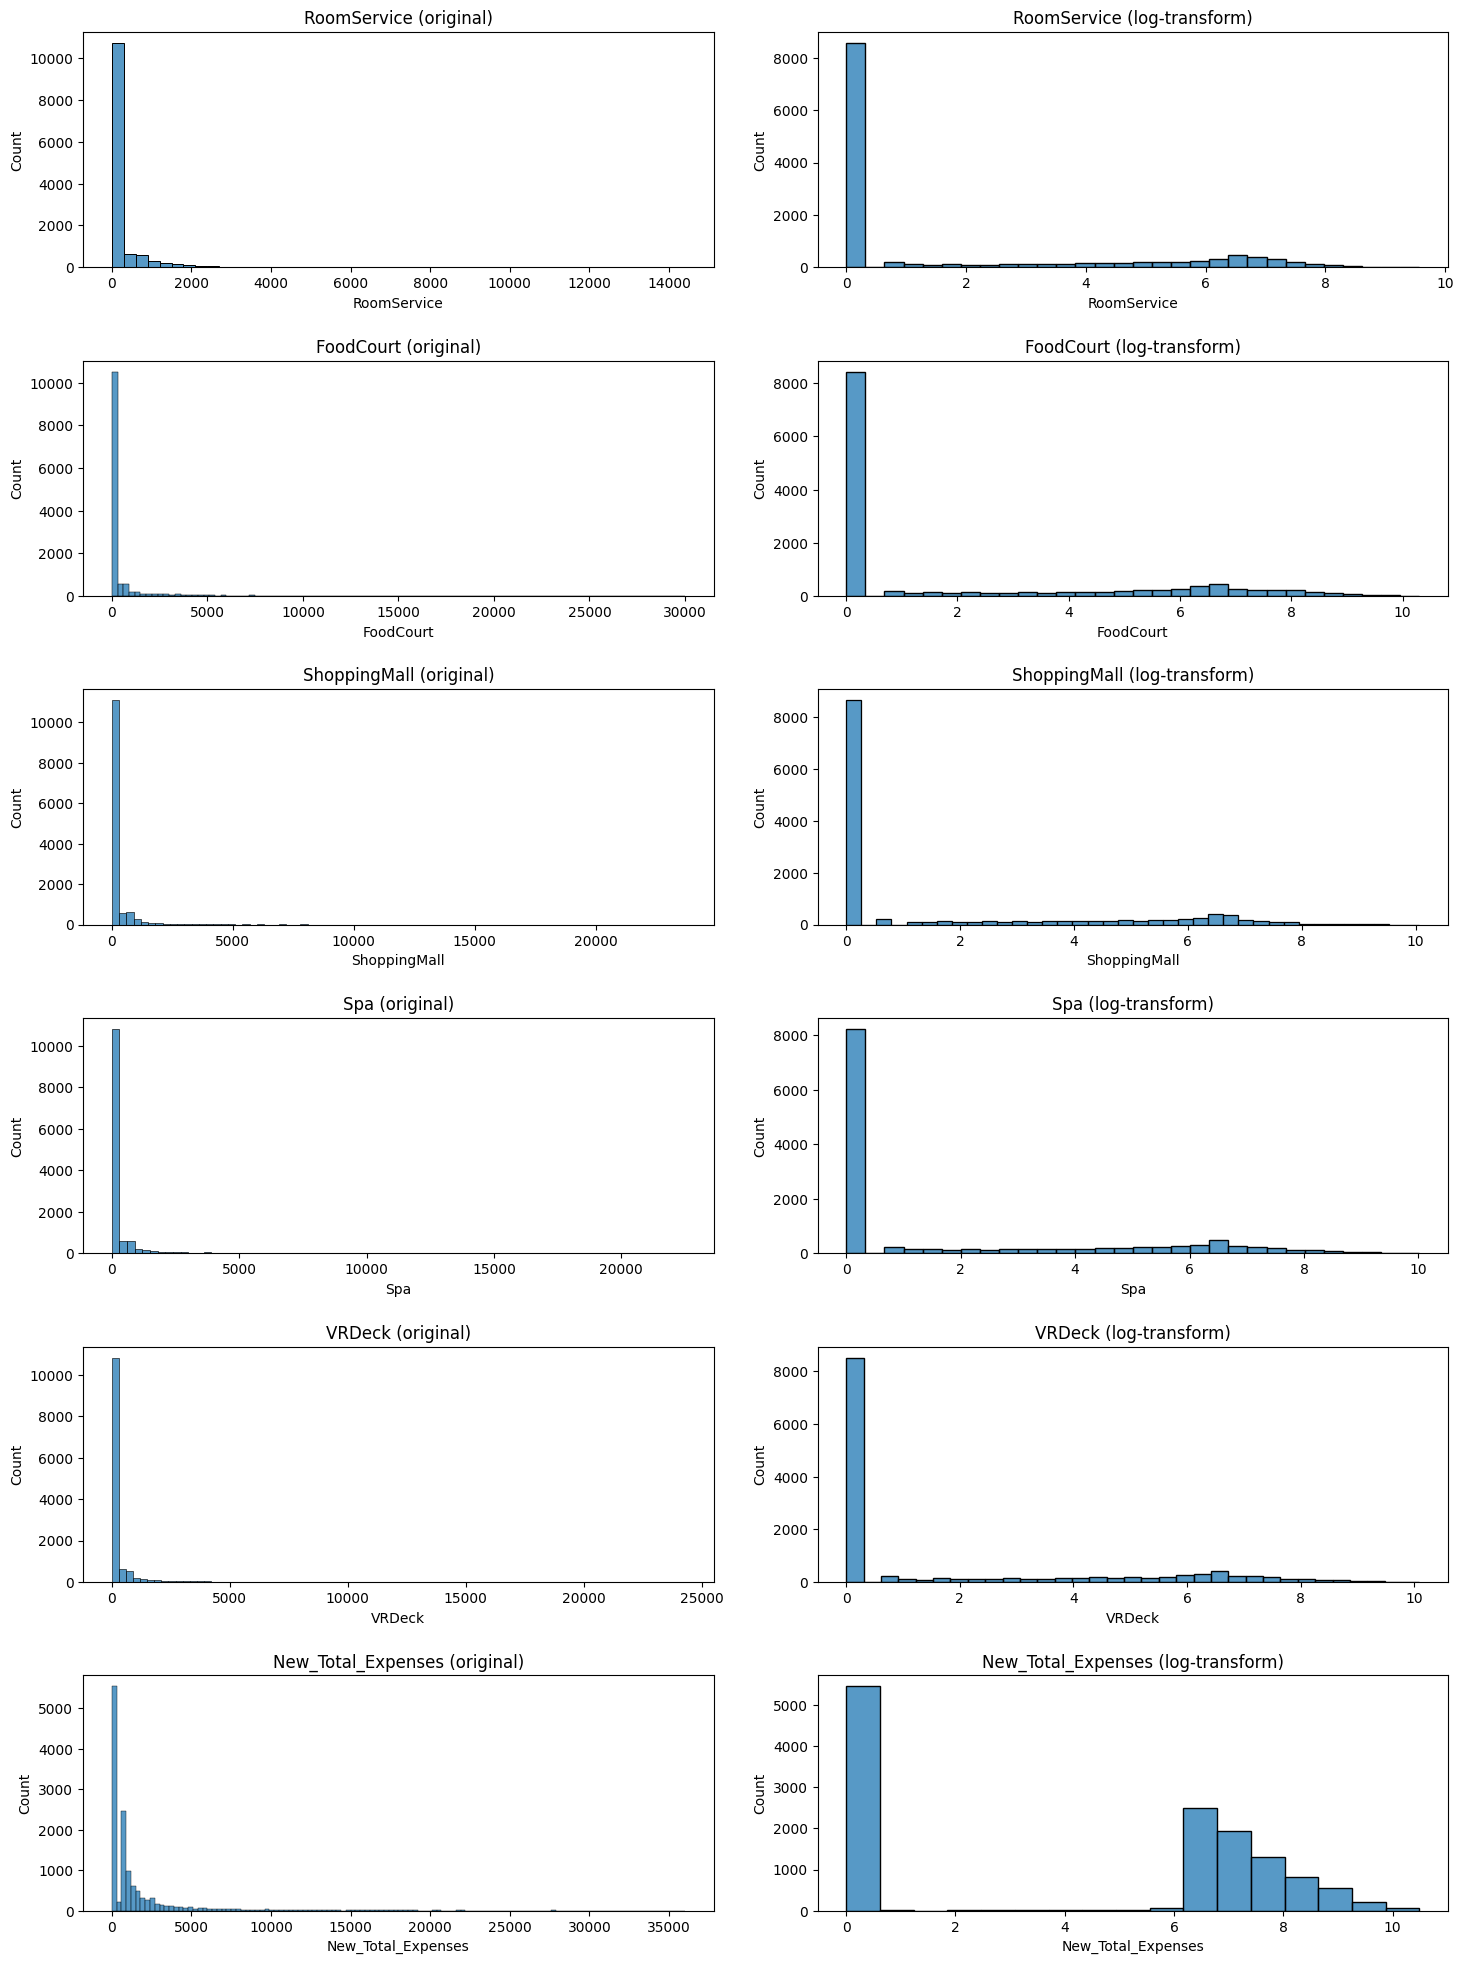

In [79]:
fig=plt.figure(figsize=(15,20))
for i, col in enumerate([col for col in num_cols if col not in ["Age","New_Family_Size"]]):
    plt.subplot(6,2,2*i+1)

    sns.histplot(df[col], binwidth=300)
    plt.title(f"{col} (original)")
    
    plt.subplot(6,2,2*i+2)

    sns.histplot(np.log(1+df[col]))
    plt.title(f"{col} (log-transform)")
    
fig.tight_layout(pad=2)
plt.show()

In [80]:
for col in [col for col in num_cols if col not in ["Age","New_Family_Size"]]:
    df[col]=np.log(1+df[col])

In [81]:
for col in num_cols:
    scaler=StandardScaler().fit(df[[col]])
    df[col]=scaler.transform(df[[col]])

In [82]:
df.head()

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,New_Passenger_Group,New_Cabin_Num,...,New_Group_Size_5,New_Group_Size_6,New_Group_Size_7,New_Group_Size_8,New_Age_Group_Baby,New_Age_Group_Child,New_Age_Group_Elder,New_Age_Group_Senior,New_Age_Group_Young_Adult,New_Premium_Passenger_1
0,0001_01,0.720932,-0.640372,-0.648903,-0.624889,-0.663234,-0.634810,0.0,0001,0,...,0,0,0,0,0,0,0,1,0,0
1,0002_01,-0.332557,1.086538,0.136898,0.641264,1.620304,0.755227,1.0,0002,0,...,0,0,0,0,0,0,0,0,1,0
2,0003_01,2.055350,0.749902,2.143455,-0.624889,2.525889,0.793700,0.0,0003,0,...,0,0,0,0,0,0,1,0,0,1
3,0003_02,0.299536,-0.640372,1.793810,1.675295,2.272011,1.288796,0.0,0003,0,...,0,0,0,0,0,0,0,1,0,0
4,0004_01,-0.894417,1.460007,0.805817,1.327477,1.630682,-0.233642,1.0,0004,1,...,0,0,0,0,0,0,0,0,0,0


Split dataframe to train and test

In [100]:
train_df=df[df["PassengerId"].apply(lambda x: True if x in list(train_id) else False)]

In [97]:
test_df=df[df["PassengerId"].apply(lambda x: True if x in list(test_id) else False)]

Training

In [105]:
train_df=train_df.drop(["PassengerId","New_Name","New_Surname","New_Passenger_Group","New_Cabin_Num"],axis=1)
test_df=test_df.drop(["PassengerId","New_Name","New_Surname","New_Passenger_Group","New_Cabin_Num"],axis=1)

In [107]:
y=train_df[["Transported"]]
X=train_df.drop(["Transported"],axis=1)

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [110]:
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)

In [111]:
models = [('LR', LogisticRegression()),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier()),
          ('RF', RandomForestClassifier()),
          ("XGB", XGBClassifier(objective='reg:squarederror')),
          ("LightGBM", LGBMClassifier(force_col_wise=True,verbose=-1))
          ]

In [113]:
for name, model in models:

    cv_results = cross_validate(model, X, y.values.ravel(), cv=5, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
    print(f"########## {name} ##########")
    print(f"Accuracy: {round(cv_results['test_accuracy'].mean(), 4)}")
    print(f"Auc: {round(cv_results['test_roc_auc'].mean(), 4)}")
    print(f"Recall: {round(cv_results['test_recall'].mean(), 4)}")
    print(f"Precision: {round(cv_results['test_precision'].mean(), 4)}")
    print(f"F1: {round(cv_results['test_f1'].mean(), 4)}\n")

########## LR ##########
Accuracy: 0.7738
Auc: 0.8497
Recall: 0.7885
Precision: 0.7693
F1: 0.7782

########## KNN ##########
Accuracy: 0.7567
Auc: 0.8285
Recall: 0.7382
Precision: 0.7705
F1: 0.7535

########## CART ##########
Accuracy: 0.7359
Auc: 0.7381
Recall: 0.7391
Precision: 0.7373
F1: 0.738

########## RF ##########
Accuracy: 0.7844
Auc: 0.867
Recall: 0.7451
Precision: 0.8126
F1: 0.7767

########## XGB ##########
Accuracy: 0.7878
Auc: 0.8736
Recall: 0.7921
Precision: 0.7891
F1: 0.7901

########## LightGBM ##########
Accuracy: 0.8013
Auc: 0.8884
Recall: 0.82
Precision: 0.794
F1: 0.8062



Optimization

In [114]:
model=LGBMClassifier(force_col_wise=True,verbose=-1)

In [115]:
model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0,
 'force_col_wise': True,
 'verbose': -1}

In [134]:
lgbm_params = {
    "boosting_type": ["gbdt","rf"],
    "num_leaves ":[31,20,40],
    "n_estimators":[100,500,1000,1500],
    "colsample_bytree":[1,0.5,0.7],
    "max_depth":[-1,5,10]
    }

In [ ]:
lgbm_gs_best = GridSearchCV(model,
                            lgbm_params,
                            cv=5,
                            n_jobs=-1,
                            verbose=True).fit(X, y.values.ravel())

In [136]:
lgbm_gs_best.best_params_

{'boosting_type': 'gbdt',
 'colsample_bytree': 1,
 'max_depth': 5,
 'n_estimators': 100,
 'num_leaves ': 31}

In [141]:
lgbm_params = {
    "n_estimators":range(10,200,10),
    "max_depth":range(-1,10,1),
    "colsample_bytree":[0.7]
    }

In [142]:
lgbm_gs_best = GridSearchCV(model,
                            lgbm_params,
                            cv=5,
                            n_jobs=-1,
                            verbose=True).fit(X, y.values.ravel())

Fitting 5 folds for each of 209 candidates, totalling 1045 fits


In [143]:
lgbm_gs_best.best_params_

{'colsample_bytree': 0.7, 'max_depth': -1, 'n_estimators': 60}

Final Model

In [144]:
final_model = model.set_params(**lgbm_gs_best.best_params_).fit(X, y.values.ravel())

cv_results = cross_validate(final_model, X, y.values.ravel(), cv=5, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
print(f"Accuracy: {round(cv_results['test_accuracy'].mean(), 4)}")
print(f"Auc: {round(cv_results['test_roc_auc'].mean(), 4)}")
print(f"Recall: {round(cv_results['test_recall'].mean(), 4)}")
print(f"Precision: {round(cv_results['test_precision'].mean(), 4)}")
print(f"F1: {round(cv_results['test_f1'].mean(), 4)}\n")


Accuracy: 0.8062
Auc: 0.8899
Recall: 0.8291
Precision: 0.7965
F1: 0.8117



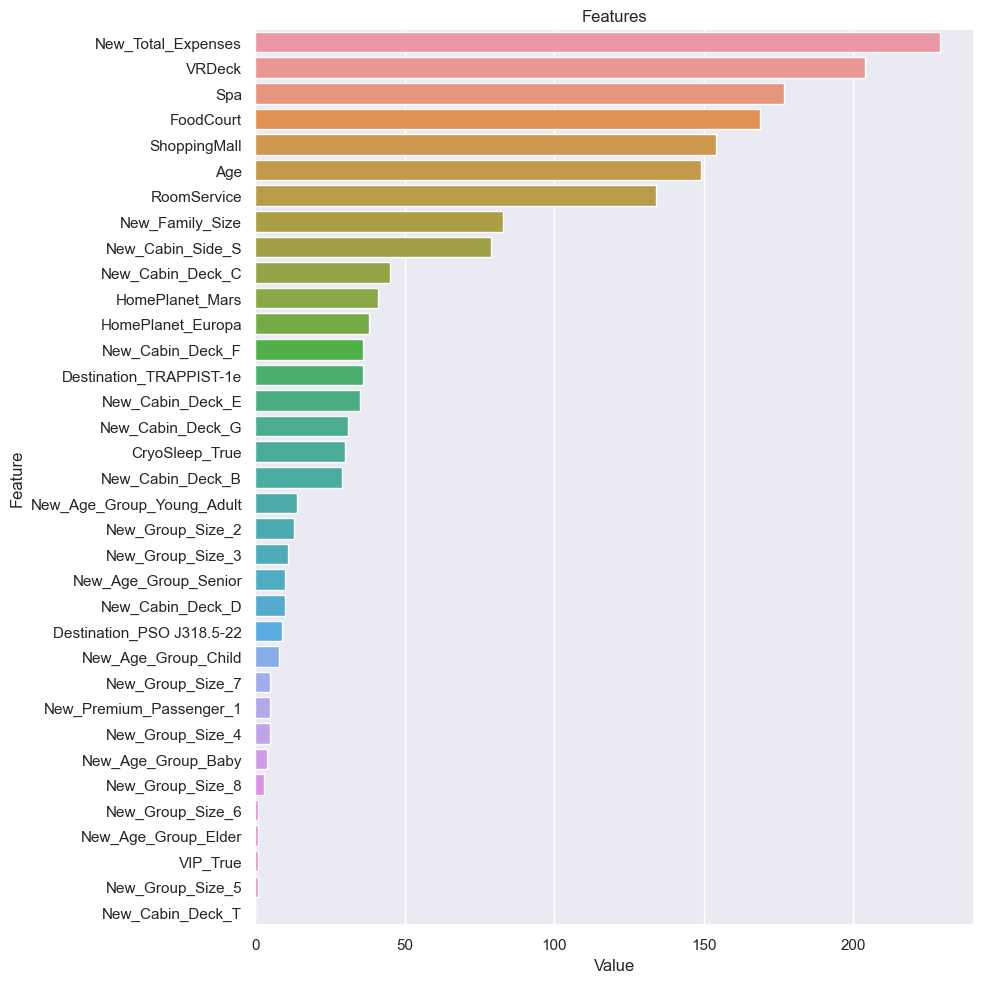

In [145]:
pp_train.plotImportance(model=final_model,features=X)

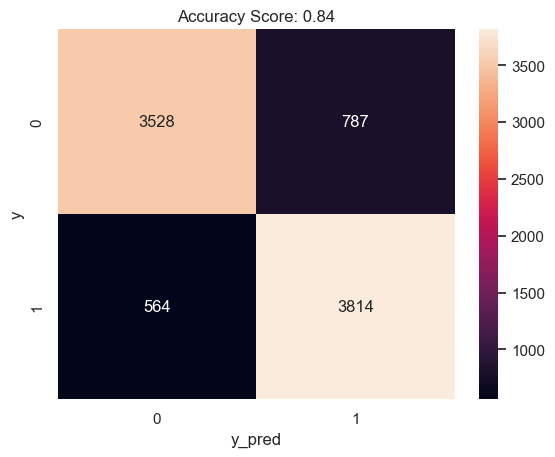

In [146]:
pp_train.plotConfusionMatrix(y=y,y_pred=final_model.predict(X))

In [152]:
predictions=final_model.predict(test_df.drop("Transported",axis=1))

Submission

In [147]:
sub_df=pd.read_csv("sample_submission.csv")

In [167]:
sub_df["Transported"]=predictions
sub_df=sub_df.replace({1:True,0:False})

In [168]:
sub_df.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [169]:
sub_df.to_csv('submission.csv', index = False)